In [1]:
import pandas as pd

df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
from sklearn.preprocessing import LabelEncoder

for category in ['Month', 'VisitorType']:
    le = LabelEncoder()
    le.fit(df[category])
    df[category] = le.transform(df[category])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,False,False


In [3]:
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (9864, 17)
y_train (9864,)
X_test (2466, 17)
y_test (2466,)


## ロジスティック回帰

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [6]:
log_reg.score(X_test, y_test)

0.8815896188158961

In [7]:
log_reg.score(X_train, y_train)

0.8842254663422546

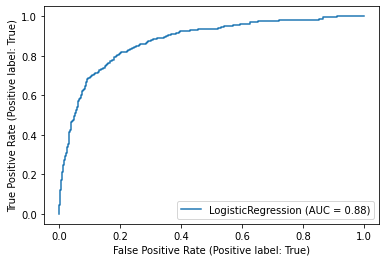

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()

## 決定木

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

0.9058191403081914
0.8811841038118411


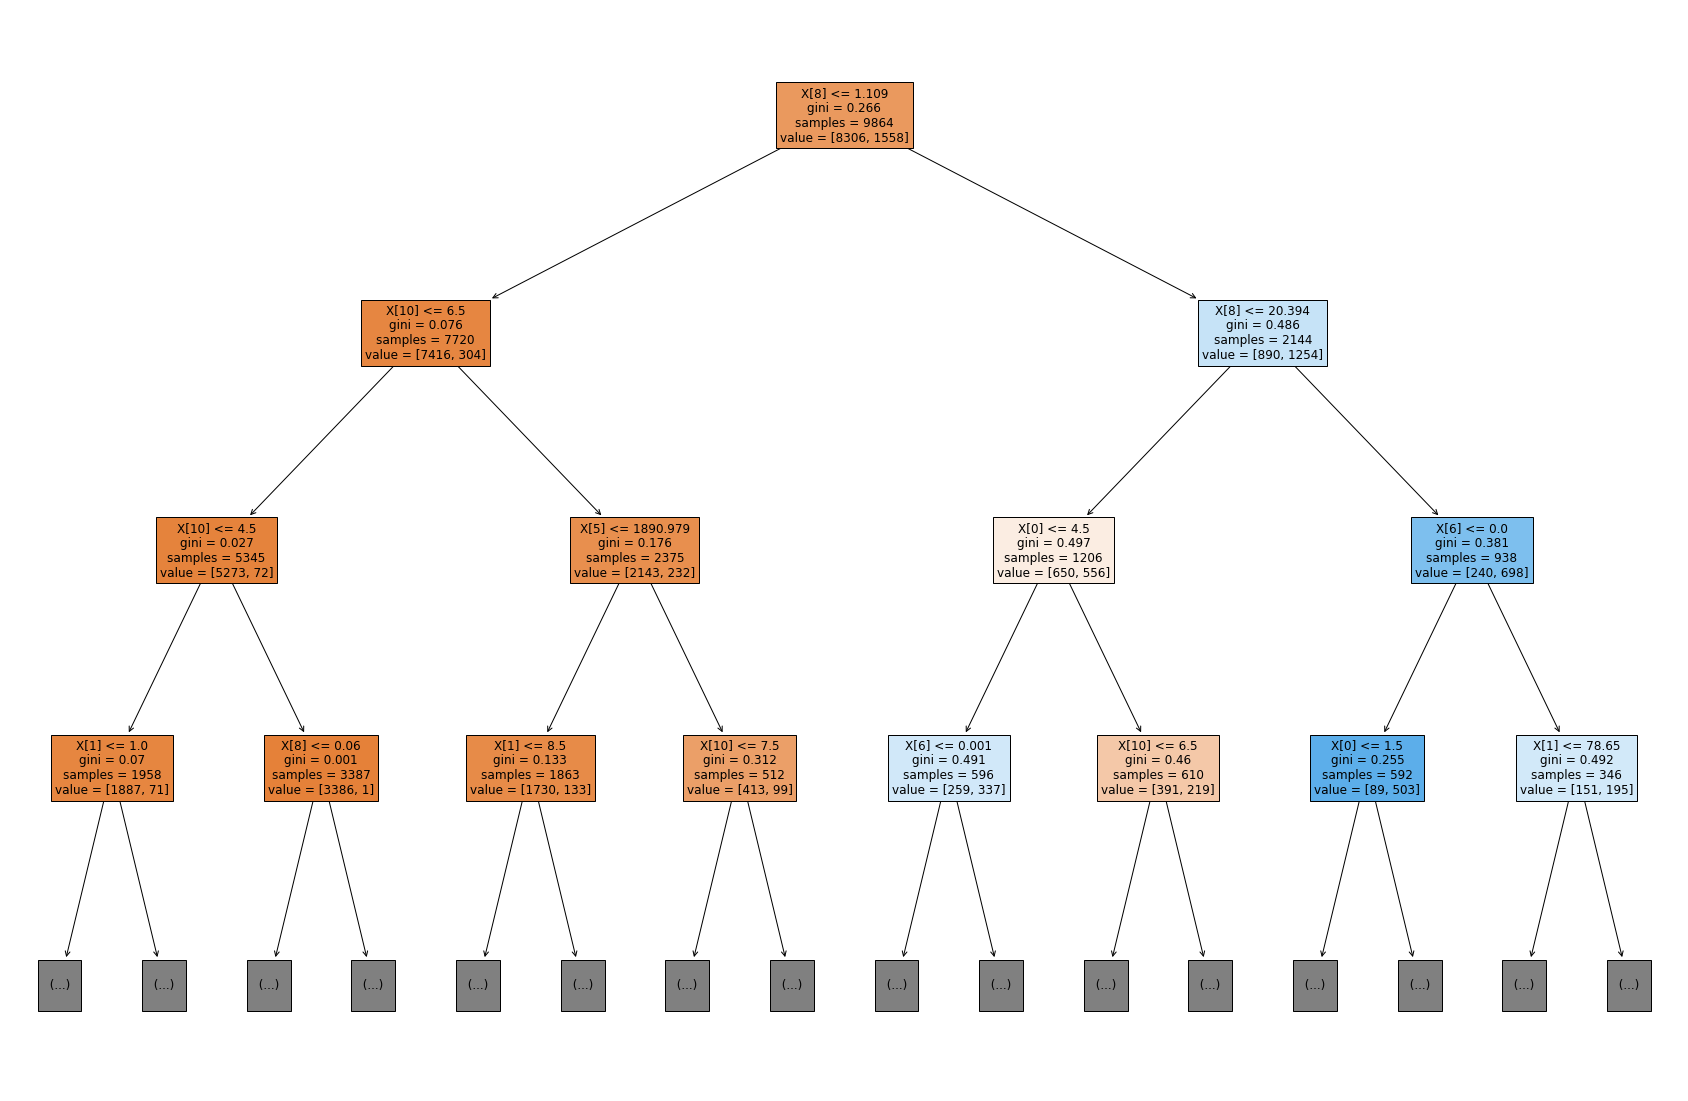

In [11]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(30, 20))
plot_tree(
    dtree,
    label='all',
    max_depth=3, 
    filled=True,
    fontsize=12, 
)
plt.show()

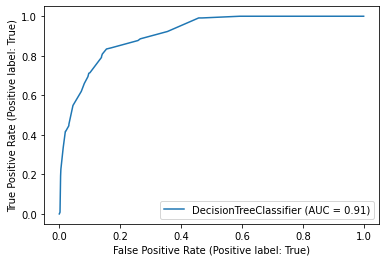

In [12]:
RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.show()

## ランダムフォレスト

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [14]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9095701540957015
0.9038929440389294


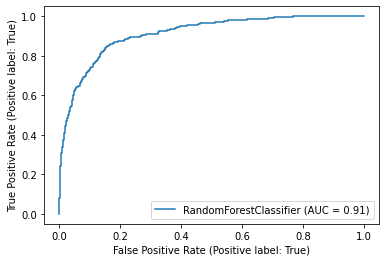

In [15]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

## XGboost

In [16]:
from xgboost import XGBClassifier

xgb_reg = XGBClassifier(n_estimators=5, use_label_encoder=False, eval_metric='logloss')
xgb_reg.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [26]:
print(xgb_reg.score(X_train, y_train))
print(xgb_reg.score(X_test, y_test))

0.921735604217356
0.9022708840227088


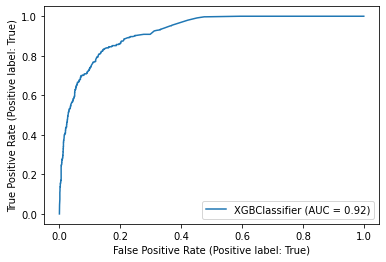

In [27]:
RocCurveDisplay.from_estimator(xgb_reg, X_test, y_test)
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

xgb_reg_cv = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    {'max_depth': [3,4,5,6], 
     'n_estimators': [10,12,15,20], 
     'learning_rate': [0.3,0.4,0.5,0.6]}, 
    cv=5, verbose=1)
xgb_reg_cv.fit(X_train, y_train)

print(xgb_reg_cv.best_params_, xgb_reg_cv.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 15} 0.9038926625056929


In [31]:
xgb_reg2 = XGBClassifier(learning_rate=0.4, max_depth=3, n_estimators=15, use_label_encoder=False, eval_metric='logloss')
xgb_reg2.fit(X_train, y_train)
print(xgb_reg2.score(X_train, y_train))
print(xgb_reg2.score(X_test, y_test))

0.9109894566098946
0.9087591240875912


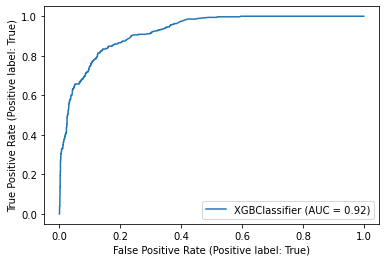

In [32]:
RocCurveDisplay.from_estimator(xgb_reg2, X_test, y_test)
plt.show()